In [2]:
import pandas as pd
import matplotlib.pyplot as plt

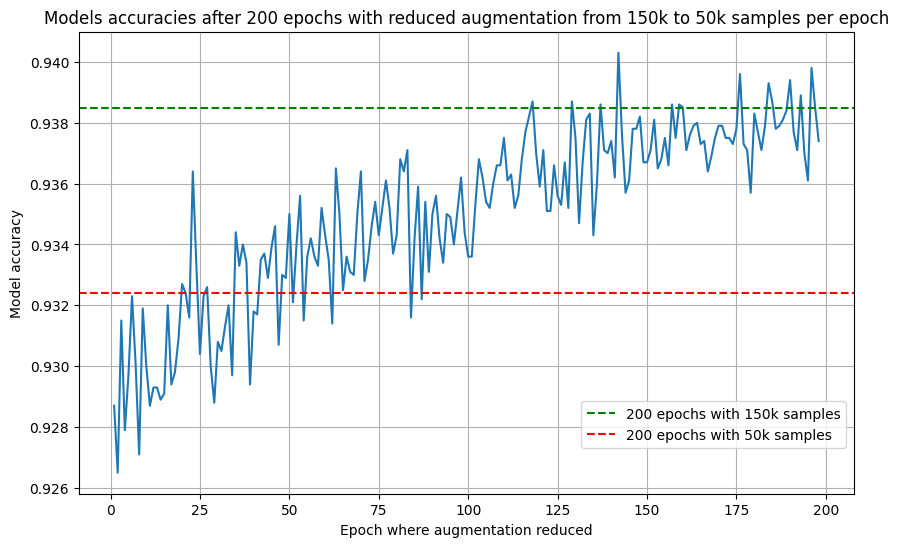

In [5]:
# Experimental variables
n = 200
original_train_size = 50000
k_hi = 3
k_lo = 1
model = 'ResNet32'
dataset = 'CIFAR10'

# Load data from CSV
input_data = pd.read_csv('./no_aug_log.csv')

# Keep only the samples of the chosen
input_data = input_data[input_data['model'].str.contains(model)]

# Extract epochs and accuracies
epochs, accuracies = input_data['initial_epoch'].tolist(), input_data['accuracy'].tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs[1:-1], accuracies[1:-1])
plt.axhline(y=accuracies[-1], color='g', linestyle='--', label=f'{n} epochs with {k_hi*original_train_size//1000}k samples')
plt.axhline(y=accuracies[0], color='r', linestyle='--', label=f'{n} epochs with {k_lo*original_train_size//1000}k samples')

# Move the legend to the top right corner outside the plot
plt.legend(loc='lower right', bbox_to_anchor=(0.99, 0.1), borderaxespad=0.)

# Title and labels
plt.title(f'Models accuracies after {n} epochs with reduced augmentation from {k_hi*original_train_size//1000}k to {k_lo*original_train_size//1000}k samples per epoch')
plt.xlabel('Epoch where augmentation reduced')
plt.ylabel('Model accuracy')

# Enable grid
plt.grid(True)

# Save the plot as an SVG file
plt.savefig(f'./figures/{model}_{dataset}_no_aug_results.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()